In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import re
from cycler import cycler

In [2]:
#Annual population estimates from Puerto Rico 
df=pd.read_csv('PEP_2017_PEPANNRES/populationpuertorico.csv',encoding='latin-1')
df.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017
0,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017
1,0500000US72001,72001,"Adjuntas Municipio, Puerto Rico",19483,19483,19472,19297,19116,19019,18798,18560,18276,17971
2,0500000US72003,72003,"Aguada Municipio, Puerto Rico",41959,41959,41913,41532,41107,40707,40135,39539,38853,38118
3,0500000US72005,72005,"Aguadilla Municipio, Puerto Rico",60949,60949,60766,59976,58978,58036,57078,55808,54525,53164
4,0500000US72007,72007,"Aguas Buenas Municipio, Puerto Rico",28659,28659,28652,28333,28052,27782,27350,26913,26382,25850


In [3]:
df['GEO.display-label']=df['GEO.display-label'].str.extract(r'(.*)Municipio')
df=df.rename(columns={'rescen42010':'April 1, 2010 Census','resbase42010': 'April 1, 2010 Estimates Base', 
                                   'respop72010': 'Population Estimate July 1, 2010', 'respop72011': 'Population Estimate July 1, 2011', 
                                   'respop72012':'Population Estimate July 1, 2012','respop72013':'Population Estimate July 1, 2013',
                                   'respop72014':'Population Estimate July 1, 2014','respop72015':'Population Estimate July 1, 2015',
                                   'respop72016':'Population Estimate July 1, 2016','respop72017':'Population Estimate July 1, 2017','GEO.display-label':'Town'})

In [4]:
df= df.drop(df.index[0])

In [5]:
df=df.drop(columns=['GEO.id','GEO.id2'])

In [6]:
df.head()

,Town,"April 1, 2010 Census","April 1, 2010 Estimates Base","Population Estimate July 1, 2010","Population Estimate July 1, 2011","Population Estimate July 1, 2012","Population Estimate July 1, 2013","Population Estimate July 1, 2014","Population Estimate July 1, 2015","Population Estimate July 1, 2016","Population Estimate July 1, 2017"
1,Adjuntas,19483,19483,19472,19297,19116,19019,18798,18560,18276,17971
2,Aguada,41959,41959,41913,41532,41107,40707,40135,39539,38853,38118
3,Aguadilla,60949,60949,60766,59976,58978,58036,57078,55808,54525,53164
4,Aguas Buenas,28659,28659,28652,28333,28052,27782,27350,26913,26382,25850
5,Aibonito,25900,25900,25874,25537,25205,24879,24448,24040,23566,23108


In [7]:
df.shape

(78, 11)

In [8]:
#Cumulative Estimates of Resident Population Change and Rankings
df2=pd.read_csv('PEP_2017_PEPCUMCHG.ST05/populationchange.csv',encoding='latin-1')

In [9]:
df2=df2.drop(columns=['GEO.id','GEO.id2','GEO.display-label','GC.target-geo-id','GC.target-geo-id2','GC.display-label'])

In [10]:
df2=df2.rename(columns={'GC.display-label.1':'Town','resbase42010': 'Population Change April 1, 2010', 
                                   'respop72017': 'Population Change July 1, 2017', 'numdiff20102017': 'Change July 1, 2017', 
                                   'percdiff20102017':'Population Change Percent from 2010 to 2017','rank42010':'Change Rankings April 1, 2010',
                                   'rank72017':'Change Rankings July 1, 2017','numrank20102017':'Total Change from 2010 to 2017',
                                   'percrank20102017':'Total Change Percent from 2010 to 2017'})

In [11]:
df2= df2.drop(df.index[0])

In [12]:
df2['Town']=df2['Town'].str.extract(r'(.*)Municipio')

In [13]:
df2.head()

,Town,"Population Change April 1, 2010","Population Change July 1, 2017","Change July 1, 2017",Population Change Percent from 2010 to 2017,"Change Rankings April 1, 2010","Change Rankings July 1, 2017",Total Change from 2010 to 2017,Total Change Percent from 2010 to 2017
0,NaN,"Population Estimate - April 1, 2010 Estimates ...","Population Estimate - July 1, 2017","Change, 2010 to 2017 - Number","Change, 2010 to 2017 - Percent [1]","Rankings - Population Estimate - April 1, 2010...","Rankings - Population Estimate - July 1, 2017","Rankings - Change, 2010 to 2017 - Number","Rankings - Change, 2010 to 2017 - Percent"
2,Adjuntas,19483,17971,-1512,-7.8,65,64,19,25
3,Aguada,41959,38118,-3841,-9.2,26,28,52,35
4,Aguadilla,60949,53164,-7785,-12.8,12,12,68,61
5,Aguas Buenas,28659,25850,-2809,-9.8,49,49,38,43


In [14]:
df2.shape

(79, 9)

In [15]:
population = df.merge(df2, left_on='Town', right_on='Town')
population.head()

,Town,"April 1, 2010 Census","April 1, 2010 Estimates Base","Population Estimate July 1, 2010","Population Estimate July 1, 2011","Population Estimate July 1, 2012","Population Estimate July 1, 2013","Population Estimate July 1, 2014","Population Estimate July 1, 2015","Population Estimate July 1, 2016","Population Estimate July 1, 2017","Population Change April 1, 2010","Population Change July 1, 2017","Change July 1, 2017",Population Change Percent from 2010 to 2017,"Change Rankings April 1, 2010","Change Rankings July 1, 2017",Total Change from 2010 to 2017,Total Change Percent from 2010 to 2017
0,Adjuntas,19483,19483,19472,19297,19116,19019,18798,18560,18276,17971,19483,17971,-1512,-7.8,65,64,19,25
1,Aguada,41959,41959,41913,41532,41107,40707,40135,39539,38853,38118,41959,38118,-3841,-9.2,26,28,52,35
2,Aguadilla,60949,60949,60766,59976,58978,58036,57078,55808,54525,53164,60949,53164,-7785,-12.8,12,12,68,61
3,Aguas Buenas,28659,28659,28652,28333,28052,27782,27350,26913,26382,25850,28659,25850,-2809,-9.8,49,49,38,43
4,Aibonito,25900,25900,25874,25537,25205,24879,24448,24040,23566,23108,25900,23108,-2792,-10.8,54,54,37,47


In [16]:
population.keys()

Index(['Town', 'April 1, 2010 Census', 'April 1, 2010 Estimates Base',
       'Population Estimate July 1, 2010', 'Population Estimate July 1, 2011',
       'Population Estimate July 1, 2012', 'Population Estimate July 1, 2013',
       'Population Estimate July 1, 2014', 'Population Estimate July 1, 2015',
       'Population Estimate July 1, 2016', 'Population Estimate July 1, 2017',
       'Population Change April 1, 2010', 'Population Change July 1, 2017',
       'Change July 1, 2017', 'Population Change Percent from 2010 to 2017',
       'Change Rankings April 1, 2010', 'Change Rankings July 1, 2017',
       'Total Change from 2010 to 2017',
       'Total Change Percent from 2010 to 2017'],
      dtype='object')

In [17]:
for column in population.columns[1:]:
        try:
            population[column] = population[column].astype(int)
        except:
            population[column] = population[column].astype(float)

In [18]:
population.dtypes

Town                                            object
April 1, 2010 Census                             int32
April 1, 2010 Estimates Base                     int32
Population Estimate July 1, 2010                 int32
Population Estimate July 1, 2011                 int32
Population Estimate July 1, 2012                 int32
Population Estimate July 1, 2013                 int32
Population Estimate July 1, 2014                 int32
Population Estimate July 1, 2015                 int32
Population Estimate July 1, 2016                 int32
Population Estimate July 1, 2017                 int32
Population Change April 1, 2010                  int32
Population Change July 1, 2017                   int32
Change July 1, 2017                              int32
Population Change Percent from 2010 to 2017    float64
Change Rankings April 1, 2010                    int32
Change Rankings July 1, 2017                     int32
Total Change from 2010 to 2017                   int32
Total Chan

In [19]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)


In [20]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':False, 
    'axes.grid' : False,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['mediumseagreen','mediumaquamarine','mediumturquoise','cadetblue','skyblue','teal',
                                        'mediumspringgreen','seagreen']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [21]:
Oeste= population[population['Town'].isin(['Aguada ','Aguadilla ','Isabela','Quebradillas ','Moca ','Rincón ','Añasco ',
                                           'San Sebastián ','Lares ', 'Las Marías ','Maricao ','Mayagüez ','Cabo Rojo ',
                                           'San Germán ', 'Hormigueros ','Lajas ',
                                           'Sabana Grande ','Guánica ','Yauco '])] 
Oeste

,Town,"April 1, 2010 Census","April 1, 2010 Estimates Base","Population Estimate July 1, 2010","Population Estimate July 1, 2011","Population Estimate July 1, 2012","Population Estimate July 1, 2013","Population Estimate July 1, 2014","Population Estimate July 1, 2015","Population Estimate July 1, 2016","Population Estimate July 1, 2017","Population Change April 1, 2010","Population Change July 1, 2017","Change July 1, 2017",Population Change Percent from 2010 to 2017,"Change Rankings April 1, 2010","Change Rankings July 1, 2017",Total Change from 2010 to 2017,Total Change Percent from 2010 to 2017
1,Aguada,41959,41959,41913,41532,41107,40707,40135,39539,38853,38118,41959,38118,-3841,-9.2,26,28,52,35
2,Aguadilla,60949,60949,60766,59976,58978,58036,57078,55808,54525,53164,60949,53164,-7785,-12.8,12,12,68,61
5,Añasco,29261,29261,29265,29094,28851,28619,28317,27942,27521,27059,29261,27059,-2202,-7.5,48,46,32,23
11,Cabo Rojo,50917,50917,50971,50802,50653,50542,50159,49773,49333,48824,50917,48824,-2093,-4.1,16,16,28,11
28,Guánica,19427,19427,19376,18975,18624,18240,17809,17361,16864,16363,19427,16363,-3064,-15.8,66,68,42,76
34,Hormigueros,17250,17250,17250,17162,17028,16885,16702,16493,16260,16032,17250,16032,-1218,-7.1,69,69,13,21
40,Lajas,25753,25753,25704,25386,25118,24792,24392,23918,23435,22929,25753,22929,-2824,-11.0,55,55,39,50
41,Lares,30753,30753,30631,30004,29369,28793,28106,27370,26564,25772,30753,25772,-4981,-16.2,44,50,61,78
42,Las Marías,9881,9881,9869,9679,9501,9340,9105,8875,8646,8402,9881,8402,-1479,-15.0,75,76,18,71
47,Maricao,6276,6276,6277,6204,6130,6080,5988,5880,5774,5665,6276,5665,-611,-9.7,77,77,5,40


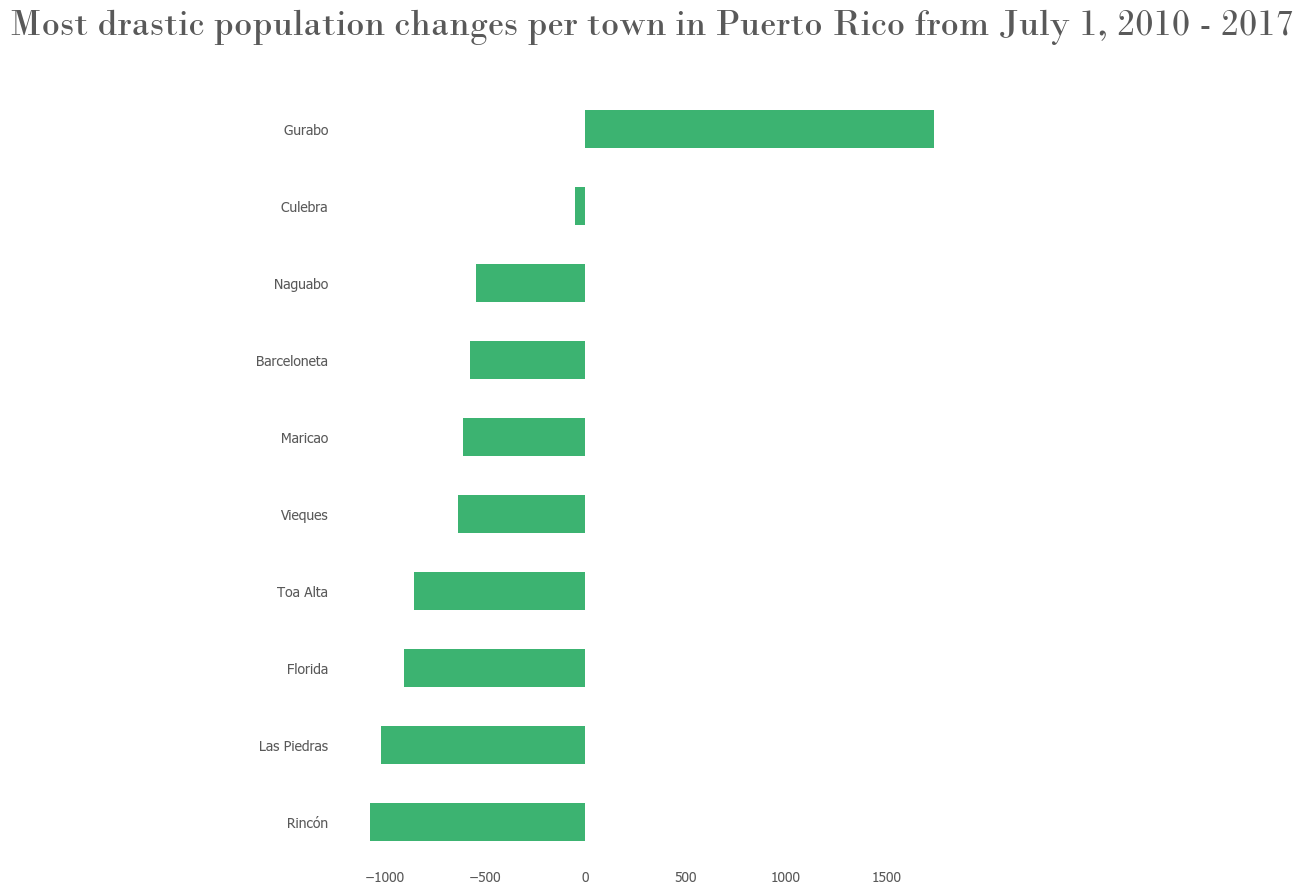

In [22]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= population.sort_values(by='Change July 1, 2017', ascending=False).head(10)
ax = df.plot(kind='barh', x='Town',y='Change July 1, 2017',figsize=(8, 10), color=color,legend=False,rot=0)
ax.set_title('Most drastic population changes per town in Puerto Rico from July 1, 2010 - 2017',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
#plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('OverallPopulationChange.pdf', transparent=True)
plt.show()

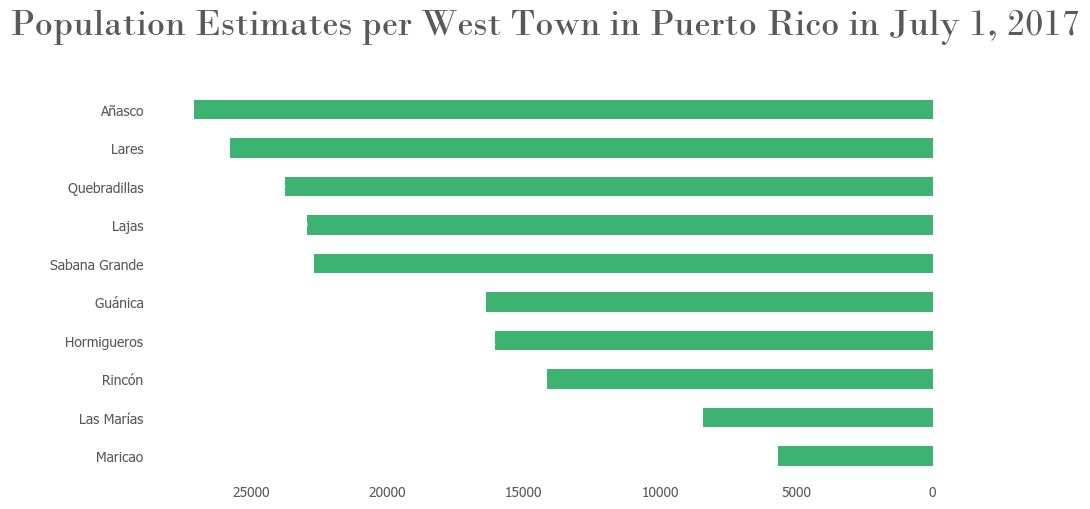

In [23]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= Oeste.sort_values(by='Population Estimate July 1, 2017', ascending=True).head(10)
ax = df.plot(kind='barh', x='Town',y='Population Estimate July 1, 2017',figsize=(10, 5), color=color,legend=False,rot=0)
ax.set_title('Population Estimates per West Town in Puerto Rico in July 1, 2017',pad=40)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos=bar.get_width()-30  
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.gca().invert_xaxis()
#plt.savefig('testPopulation.pdf')
plt.show()

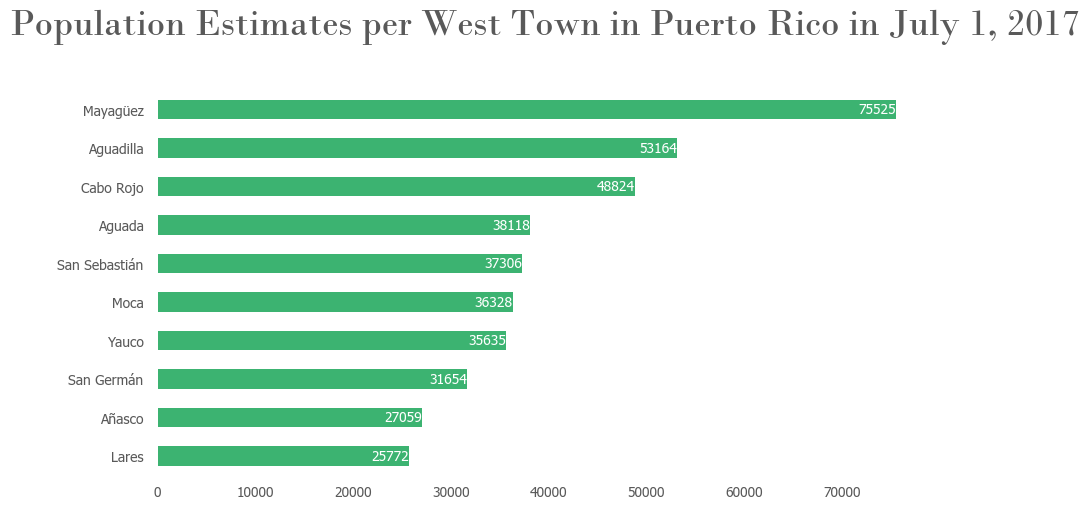

In [24]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= Oeste.sort_values(by='Population Estimate July 1, 2017', ascending=False).head(10)
ax = df.plot(kind='barh', x='Town',y='Population Estimate July 1, 2017',figsize=(10, 5), color=color,legend=False,rot=0)
ax.patches

for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.set_title('Population Estimates per West Town in Puerto Rico in July 1, 2017',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.gca().invert_yaxis()

#ax.set_xticklabels([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])
#plt.savefig('westtestPopulation2017.pdf')
plt.show()

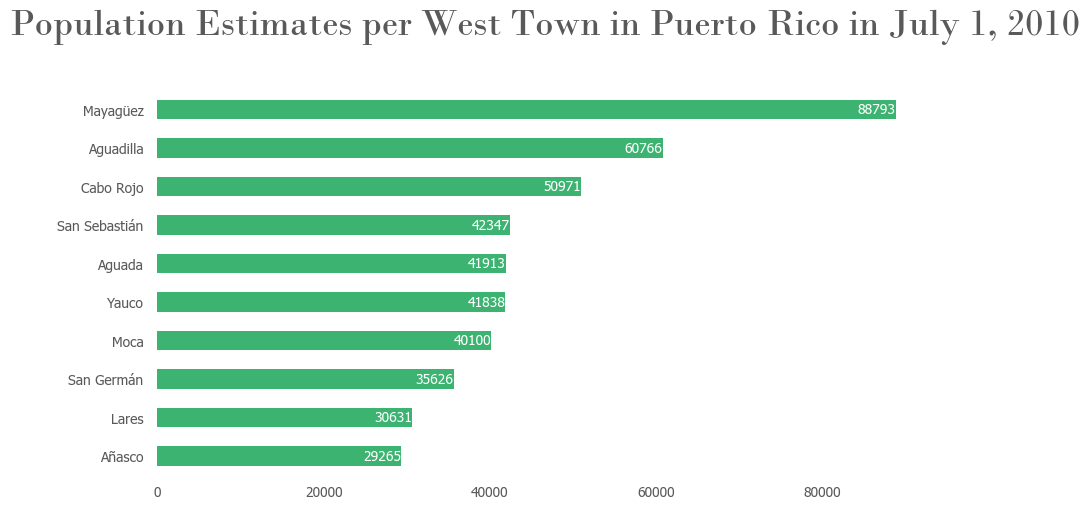

In [25]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= Oeste.sort_values(by='Population Estimate July 1, 2010', ascending=False).head(10)
ax = df.plot(kind='barh', x='Town',y='Population Estimate July 1, 2010',figsize=(10, 5), color=color,legend=False,rot=0)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.set_title('Population Estimates per West Town in Puerto Rico in July 1, 2010',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.gca().invert_yaxis()
plt.show()
#plt.savefig('westtestPopulation2010.pdf')

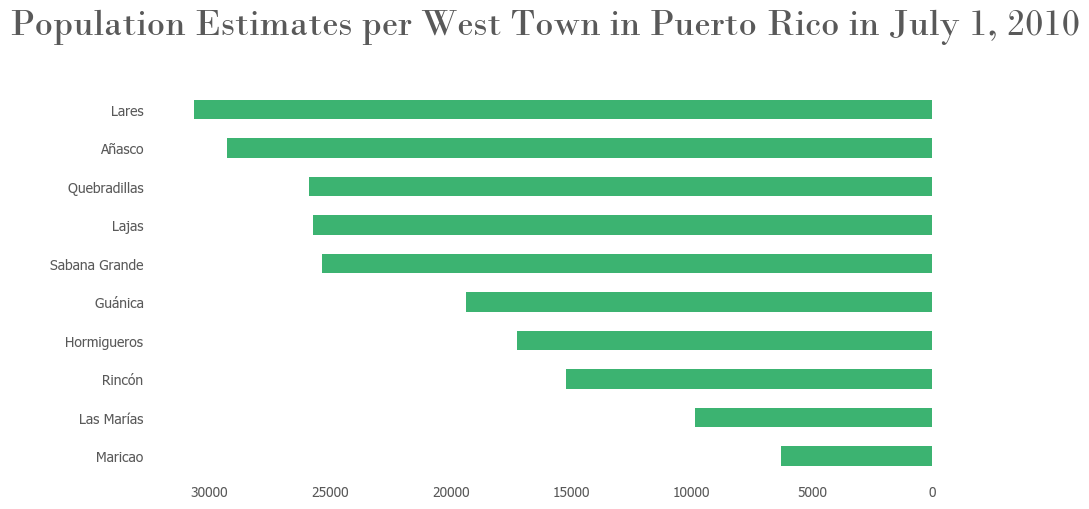

In [26]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= Oeste.sort_values(by='Population Estimate July 1, 2010', ascending=True).head(10)
ax = df.plot(kind='barh', x='Town',y='Population Estimate July 1, 2010',figsize=(10, 5), color=color,legend=False,rot=0)
ax.set_title('Population Estimates per West Town in Puerto Rico in July 1, 2010',pad=40)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
#plt.savefig('testPopulation.pdf')
plt.gca().invert_xaxis()
plt.show()

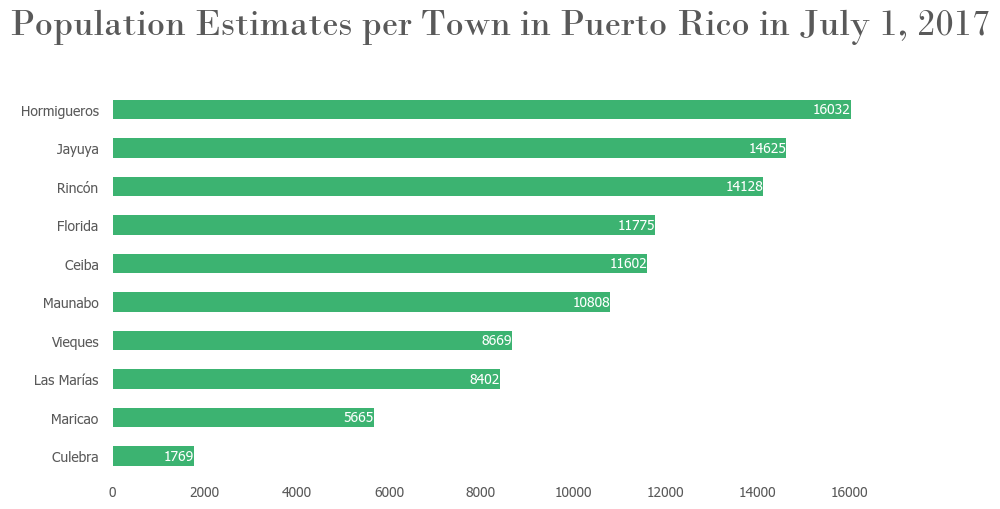

In [27]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= population.sort_values(by='Population Estimate July 1, 2017', ascending=True).head(10)
ax = df.plot(kind='barh', x='Town',y='Population Estimate July 1, 2017',figsize=(10, 5), color=color,legend=False,rot=0)
ax.set_title('Population Estimates per Town in Puerto Rico in July 1, 2017',pad=40)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
#plt.gca().invert_xaxis()
plt.savefig('PopEstimatesJuly2017.pdf', transparent=True)
plt.show()

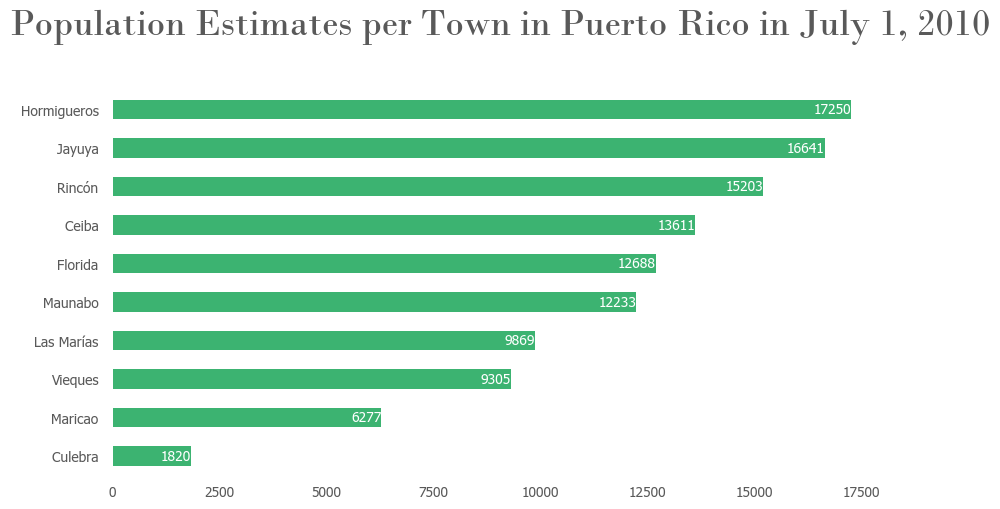

In [28]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= population.sort_values(by='Population Estimate July 1, 2010', ascending=True).head(10)
ax = df.plot(kind='barh', x='Town',y='Population Estimate July 1, 2010',figsize=(10, 5), color=color,legend=False,rot=0)
ax.set_title('Population Estimates per Town in Puerto Rico in July 1, 2010',pad=40)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
#plt.gca().invert_axis()
plt.savefig('PopEstimatesJuly2010.pdf', transparent=True)
plt.show()

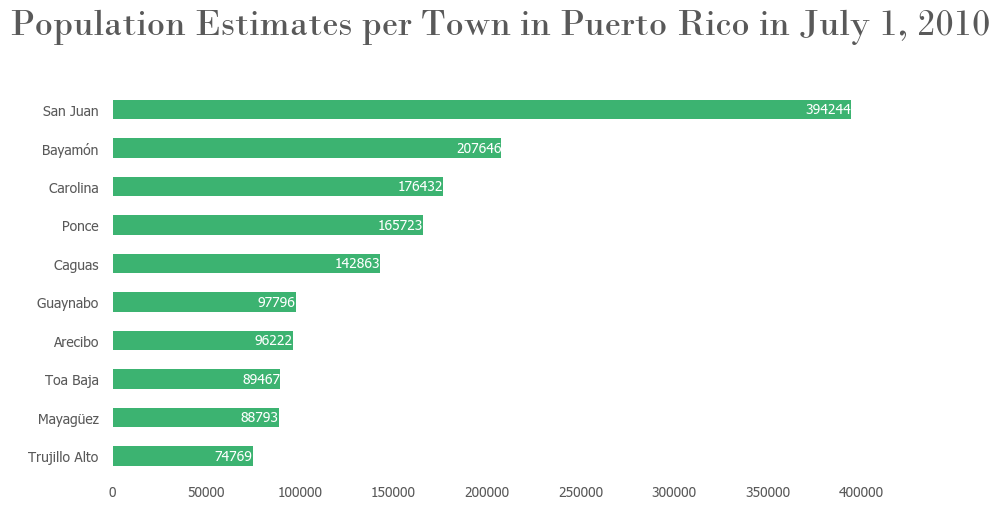

In [29]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= population.sort_values(by='Population Estimate July 1, 2010', ascending=False).head(10)
ax = df.plot(kind='barh', x='Town',y='Population Estimate July 1, 2010',figsize=(10, 5), color=color,legend=False,rot=0)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.set_title('Population Estimates per Town in Puerto Rico in July 1, 2010',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.gca().invert_yaxis()
plt.savefig('MostPopEstimatesJuly2010.pdf', transparent=True)
plt.show()

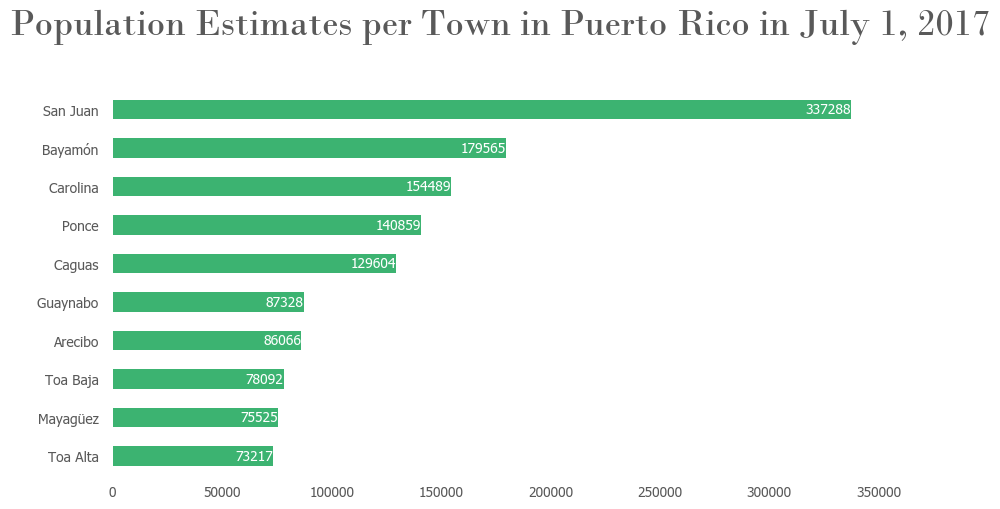

In [30]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= population.sort_values(by='Population Estimate July 1, 2017', ascending=False).head(10)
ax = df.plot(kind='barh', x='Town',y='Population Estimate July 1, 2017',figsize=(10, 5), color=color,legend=False,rot=0)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.set_title('Population Estimates per Town in Puerto Rico in July 1, 2017',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.gca().invert_yaxis()
plt.savefig('MostPopEstimatesJuly2017.pdf', transparent=True)
plt.show()

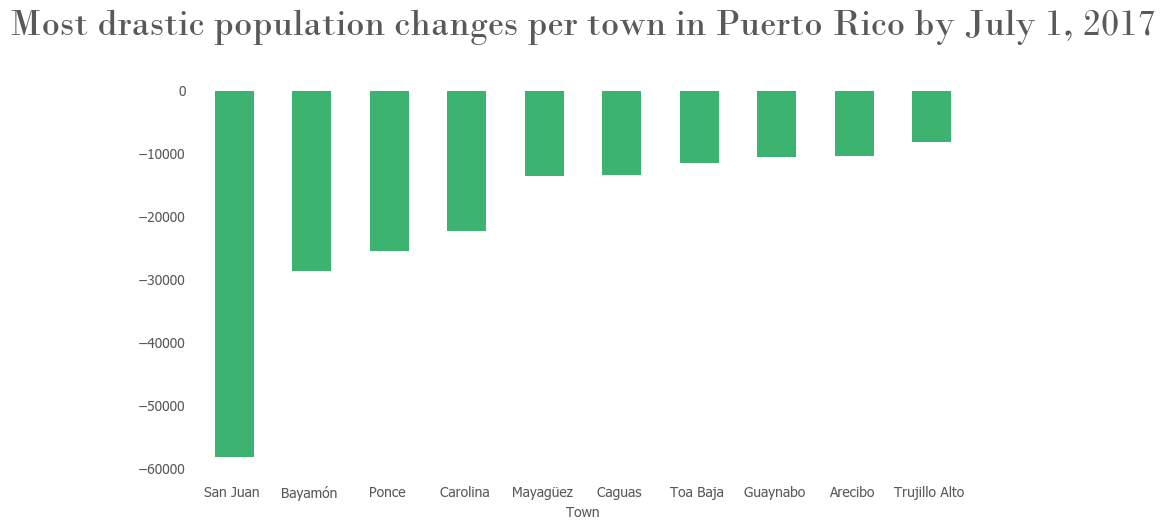

In [31]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
df= population.sort_values(by='Change July 1, 2017', ascending=True).head(10)
ax = df.plot(kind='bar', x='Town',y='Change July 1, 2017',figsize=(10, 5), color=color,legend=False,rot=0)
ax.set_title('Most drastic population changes per town in Puerto Rico by July 1, 2017',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
#plt.gca().invert_yaxis()
plt.savefig('MostDracticPopEstimatesJuly2017.pdf', transparent=True)
plt.show()

Now lets look at the income data

In [32]:
social= pd.read_csv('ACS_16_5YR_S1901.csv')
social.head()

,Subject,Households Estimate,Margin of Error,Families Estimate,Margin of Error.1,Married-couple families Estimate,Margin of Error.2,Nonfamily households Estimate,Margin of Error.3
0,Total,1237180,"+/-3,604",867816,"+/-3,686",490107,"+/-3,667",369364,"+/-3,830"
1,"Less than $10,000",28.8,+/-0.3,23.4,+/-0.3,12.4,+/-0.3,44.5,+/-0.5
2,"$10,000 to $14,999",11.7,+/-0.2,10.2,+/-0.2,9.3,+/-0.3,15.8,+/-0.4
3,"$15,000 to $24,999",18.3,+/-0.2,19.0,+/-0.3,19.1,+/-0.4,17.0,+/-0.4
4,"$25,000 to $34,999",12.2,+/-0.2,13.8,+/-0.2,14.9,+/-0.3,8.2,+/-0.3


In [33]:
social.columns

Index(['Subject', 'Households Estimate', 'Margin of Error',
       'Families Estimate', 'Margin of Error.1',
       'Married-couple families Estimate', 'Margin of Error.2',
       'Nonfamily households Estimate', 'Margin of Error.3'],
      dtype='object')

In [34]:
#Dropping what I do not need. 
social= social.drop(columns=['Margin of Error','Margin of Error.1','Margin of Error.2','Margin of Error.3'])

In [35]:
#ceros for nothing. I do not know another way to be able to do this numerical
social = social.replace('(X)',0)

In [36]:
for column in social.columns[1:]:
        try:
            social[column] = social[column].astype(int)
        except:
            social[column] = social[column].astype(float)

In [37]:
social.dtypes

Subject                              object
Households Estimate                 float64
Families Estimate                   float64
Married-couple families Estimate    float64
Nonfamily households Estimate       float64
dtype: object

In [38]:
social.head()

,Subject,Households Estimate,Families Estimate,Married-couple families Estimate,Nonfamily households Estimate
0,Total,1237180.0,867816.0,490107.0,369364.0
1,"Less than $10,000",28.8,23.4,12.4,44.5
2,"$10,000 to $14,999",11.7,10.2,9.3,15.8
3,"$15,000 to $24,999",18.3,19.0,19.1,17.0
4,"$25,000 to $34,999",12.2,13.8,14.9,8.2


In [39]:
social = social.set_index("Subject").T.reset_index()

In [40]:
social.columns = social.columns.str.replace("$","")
social

Subject,index,Total,"Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more",Median income (dollars),Mean income (dollars),Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months
0,Households Estimate,1237180.0,28.8,11.7,18.3,12.2,11.6,9.5,3.7,2.6,0.8,0.7,19606.0,30962.0,27.5,0.0,0.0
1,Families Estimate,867816.0,23.4,10.2,19.0,13.8,13.3,11.1,4.4,3.0,1.0,0.9,23417.0,34710.0,0.0,29.2,0.0
2,Married-couple families Estimate,490107.0,12.4,9.3,19.1,14.9,15.9,14.8,6.1,4.6,1.5,1.4,30859.0,44188.0,0.0,0.0,0.0
3,Nonfamily households Estimate,369364.0,44.5,15.8,17.0,8.2,6.5,4.6,1.6,1.1,0.4,0.3,11562.0,19631.0,0.0,0.0,21.6


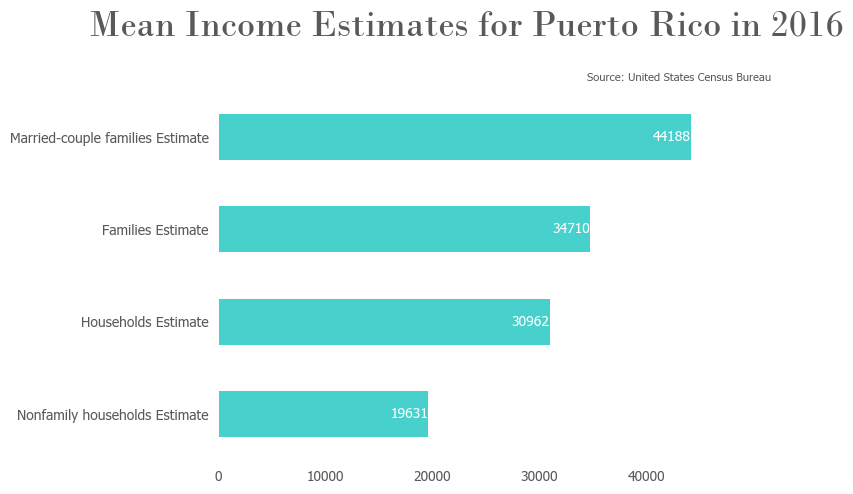

In [41]:
df= social.sort_values(by='Mean income (dollars)', ascending=True).head(10)
ax = df.plot(kind='barh', x='index',y='Mean income (dollars)',legend=False,rot=0, color='mediumturquoise')
ax.set_title('Mean Income Estimates for Puerto Rico in 2016',pad=40)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.savefig('testPopulation.pdf',transparent=True)
plt.gcf().text(0.7,0.9,'Source: United States Census Bureau', ha='left',fontsize=8)
plt.show()

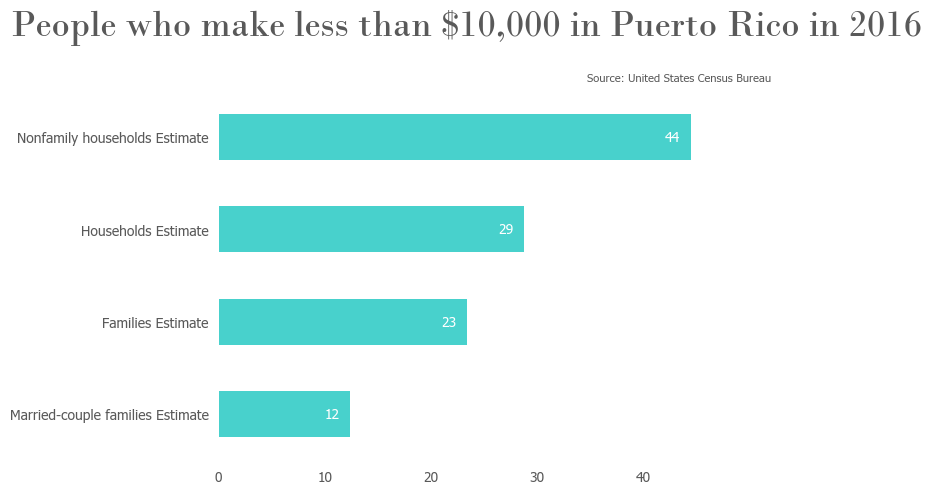

In [42]:
df= social.sort_values(by='Less than 10,000', ascending=True).head(10)
ax = df.plot(kind='barh', x='index',y='Less than 10,000',legend=False,rot=0, color='mediumturquoise')
ax.set_title('People who make less than $10,000 in Puerto Rico in 2016',pad=40)

ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.savefig('lesstestPopulation.pdf', transparent=True)
plt.gcf().text(0.7,0.9,'Source: United States Census Bureau', ha='left',fontsize=8)
plt.show()

In [43]:
data2010= pd.read_csv('Income 2010.csv')
data2010.head(3)

,Topic,Households Estimate,Margin of Error,Families Estimate,Margin of Error.1,Married-couple families Estimate,Margin of Error.2,Nonfamily households Estimate,Margin of Error.3
0,Total,1227039,"+/-3,433",912888,"+/-3,748",545249,"+/-3,377",314151,"+/-3,528"
1,"Less than $10,000",29.8,+/-0.3,24.7,+/-0.3,14.5,+/-0.3,48.1,+/-0.5
2,"$10,000 to $14,999",12.6,+/-0.2,11.8,+/-0.2,11.4,+/-0.3,15.3,+/-0.4


In [44]:
#ceros for nothing. I do not know another way to be able to do this numerical
data2010= data2010.replace('(X)',0)

In [45]:
#Dropping what I do not need. 
data2010= data2010.drop(columns=['Margin of Error','Margin of Error.1','Margin of Error.2','Margin of Error.3'])

In [46]:
for column in data2010.columns[1:]:
        try:
            data2010[column] = data2010[column].astype(float)
        except:
            data2010[column] = data2010[column].astype(int)

In [47]:
data2010 = data2010.set_index("Topic").T.reset_index()

In [48]:
data2010.columns = social.columns.str.replace("$","")
data2010

Subject,index,Total,"Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more",Median income (dollars),Mean income (dollars),Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months
0,Households Estimate,1227039.0,29.8,12.6,17.7,12.3,11.5,9.1,3.3,2.4,0.6,0.7,18791.0,29325.0,21.3,0.0,0.0
1,Families Estimate,912888.0,24.7,11.8,18.7,13.4,12.9,10.4,3.8,2.7,0.7,0.8,21764.0,32302.0,0.0,22.8,0.0
2,Married-couple families Estimate,545249.0,14.5,11.4,18.9,14.6,15.3,13.7,5.4,4.0,1.1,1.2,28307.0,40193.0,0.0,0.0,0.0
3,Nonfamily households Estimate,314151.0,48.1,15.3,14.8,8.2,6.3,4.2,1.5,1.1,0.3,0.3,10538.0,18432.0,0.0,0.0,14.8


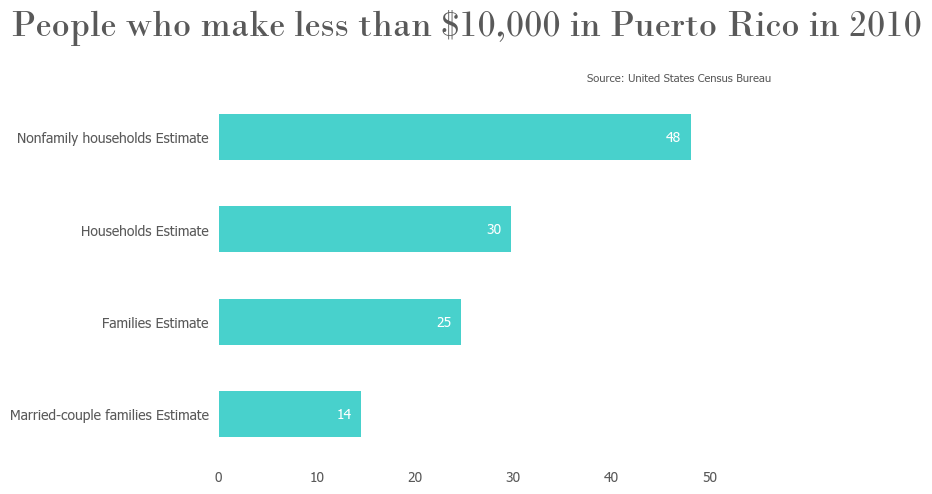

In [49]:
df= data2010.sort_values(by='Less than 10,000', ascending=True).head(10)
ax = df.plot(kind='barh', x='index',y='Less than 10,000',legend=False,rot=0, color='mediumturquoise')
ax.set_title('People who make less than $10,000 in Puerto Rico in 2010',pad=40)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.savefig('less2010testPopulation.pdf', transparent=True)
plt.gcf().text(0.7,0.9,'Source: United States Census Bureau', ha='left',fontsize=8)
plt.show()

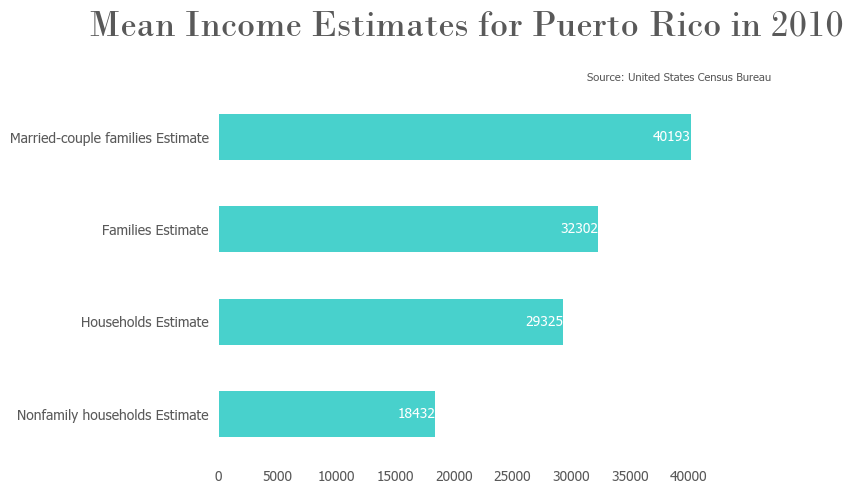

In [50]:
df= data2010.sort_values(by='Mean income (dollars)', ascending=True).head(10)
ax = df.plot(kind='barh', x='index',y='Mean income (dollars)',legend=False,rot=0, color='mediumturquoise')
ax.set_title('Mean Income Estimates for Puerto Rico in 2010',pad=40)
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='white')
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_axisbelow(False)
ax.yaxis.label.set_visible(False)
plt.savefig('meantestPopulation.pdf', transparent=True)
plt.gcf().text(0.7,0.9,'Source: United States Census Bureau', ha='left',fontsize=8)
plt.show()

Data points out that the problem is not just birth depletion, but also unstoppable emigration. The decrease of population extends through several municipalities.

However, there is also data that points out that most people that abandoned the island for hurricane reasons, is already back. 

Let's check out another data. 


In [51]:
movement=pd.read_excel('ts_dom_net_mov_201804.xlsx')
movement.head()

,Date,NÃºmero de pasajeros que salen de PR,NÃºmero de pasajeros que llegan a PR,Movimiento neto de pasajeros,Movimiento neto de pasajero Ãºltimos 12 meses,NÃºmero de pasajeros que salen de SJU,NÃºmero de pasajeros que salen de BQN,NÃºmero de pasajeros que salen de PSE,NÃºmero de pasajeros que salen de MAZ,NÃºmero de pasajeros que salen de HUC,...,Vuelos que despegan de Jetblue Airways,Vuelos que despegan de American Airlines Inc,Vuelos que despegan de Vieques Air Link Inc,Vuelos que despegan de Executive Airlines,Vuelos que aterrizan de Cape Air,Vuelos que aterrizan de Jetblue Airways,Vuelos que aterrizan de American Airlines Inc,Vuelos que aterrizan de Vieques Air Link Inc,Vuelos que aterrizan de Executive Airlines,Unnamed: 100
0,2018-04,341891,334097,7794,169915,304757,21915,7860,624,1310,...,872,891,475,1257,117,875,890,474,1257,0
1,2018-03,350313,352184,-1871,186611,311447,22080,7975,677,1454,...,932,830,465,1104,91,932,833,467,1104,0
2,2018-02,259969,273179,-13210,193523,233414,13976,6674,596,913,...,847,789,438,1048,74,846,790,440,1048,0
3,2018-01,267706,332429,-64723,201520,241340,14401,7241,553,748,...,902,800,476,749,96,897,800,479,749,0
4,2017-12,327100,310141,16959,281253,298418,18917,8796,578,6,...,835,800,370,0,98,837,811,376,0,0


In [52]:
movement['Date'] = pd.to_datetime(movement['Date'], format="%Y-%m")

In [53]:
movement['Year'] = movement['Date'].dt.year
movement['Month'] = movement['Date'].dt.month

In [54]:
movement=movement[movement['Year']>= 2010]

In [55]:
movement.columns

Index(['Date', 'NÃºmero de pasajeros que salen de PR',
       'NÃºmero de pasajeros que llegan a PR', 'Movimiento neto de pasajeros',
       'Movimiento neto de pasajero Ãºltimos 12 meses',
       'NÃºmero de pasajeros que salen de SJU',
       'NÃºmero de pasajeros que salen de BQN',
       'NÃºmero de pasajeros que salen de PSE',
       'NÃºmero de pasajeros que salen de MAZ',
       'NÃºmero de pasajeros que salen de HUC',
       ...
       'Vuelos que despegan de Vieques Air Link Inc',
       'Vuelos que despegan de Executive Airlines',
       'Vuelos que aterrizan de Cape Air',
       'Vuelos que aterrizan de Jetblue Airways',
       'Vuelos que aterrizan de American Airlines Inc',
       'Vuelos que aterrizan de Vieques Air Link Inc',
       'Vuelos que aterrizan de Executive Airlines', 'Unnamed: 100', 'Year',
       'Month'],
      dtype='object', length=103)

In [58]:
stay_and_go= movement[['Year','Month','NÃºmero de pasajeros que salen de PR','NÃºmero de pasajeros que llegan a PR']]
stay_and_go.head()

,Year,Month,NÃºmero de pasajeros que salen de PR,NÃºmero de pasajeros que llegan a PR
0,2018,4,341891,334097
1,2018,3,350313,352184
2,2018,2,259969,273179
3,2018,1,267706,332429
4,2017,12,327100,310141


In [59]:
stay_and_go.Year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010], dtype=int64)

In [66]:
stay_and_go["sum_per_year_left"] = stay_and_go.groupby(["Year"])["NÃºmero de pasajeros que salen de PR"].transform(sum)
stay_and_go['sum_per_year_return']=stay_and_go.groupby(["Year"])["NÃºmero de pasajeros que llegan a PR"].transform(sum)

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
yeardata = stay_and_go[['Year', 'sum_per_year_left','sum_per_year_return']]

In [72]:
yeardata=yeardata.drop_duplicates(subset=None, keep='first', inplace=False)

In [80]:
yeardata

,Year,sum_per_year_left,sum_per_year_return
0,2018,1219879,1291889
4,2017,4214687,3933434
16,2016,4414971,4326771
28,2015,4273394,4179038
40,2014,4187796,4103858
52,2013,4050003,3997778
64,2012,4100853,4035037
76,2011,3905145,3866555
88,2010,4094798,4039118


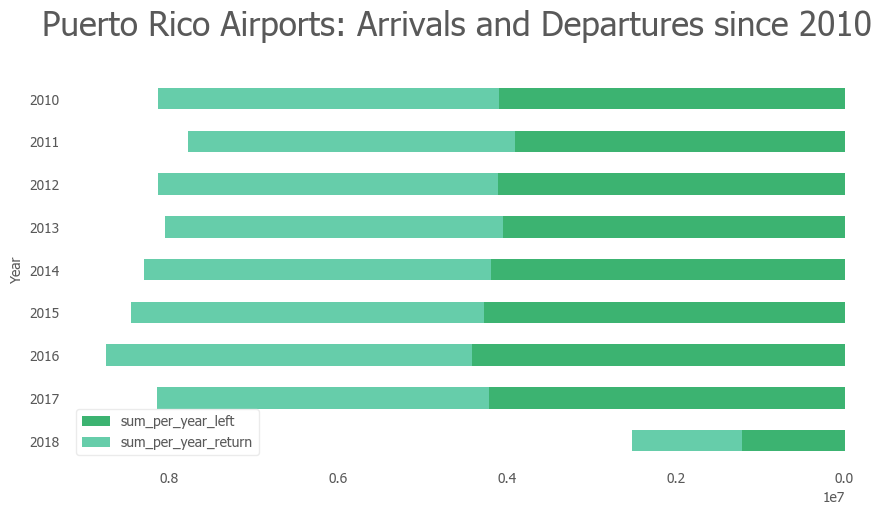

In [83]:
overall= yeardata.sort_values(by='Year',ascending=False).head(30)
ax= overall.plot(kind='barh', x='Year',stacked=True, figsize=(10,5),legend=True)
ax.set_title("Puerto Rico Airports: Arrivals and Departures since 2010", pad=30, fontsize=24)
#ax.set_xlabel('Out of the Island')
#ax.set_ylabel('Go to the Island')
#plt.gcf().text(0.5, 0.91, ", ha='center', fontsize=12)
plt.gca().invert_xaxis()
plt.savefig('year_data_fixed.pdf', transparent=True)
plt.show()